In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

In [3]:
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')

variaveis_numericas = ['IDADEMAE', 'PESO']

estatisticas = sinasc_raw.groupby('faixa_latitude')[variaveis_numericas].agg([
    'sum', 'mean', 'min', 'max', 'median', 'std', 'var'
])

print(estatisticas)

                IDADEMAE                                                 \
                     sum       mean min max median       std        var   
faixa_latitude                                                            
Abaixo de -10.5   340167  26.178775  12  53   26.0  6.320171  39.944563   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                     PESO                                              \
                      sum         mean  min   max  median         std   
faixa_latitude                                                          
Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                                
                           var  
faixa_latitude                  
Abaixo de -10.5  282805.596163  
Acima de -10.5   309678.570242  


In [4]:
sinasc_raw['faixa_area'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

variaveis_numericas_area = ['APGAR1', 'APGAR5']

estatisticas_area = sinasc_raw.groupby('faixa_area')[variaveis_numericas_area].agg([
    'sum', 'mean', 'min', 'max', 'median', 'std', 'var'
])

print(estatisticas_area)

                  APGAR1                                                  \
                     sum      mean  min   max median       std       var   
faixa_area                                                                 
Abaixo de 3000   42079.0  8.073484  0.0  10.0    8.0  1.008775  1.017627   
Acima de 3000   177079.0  8.152808  0.0  10.0    8.0  0.978517  0.957495   

                  APGAR5                                                  
                     sum      mean  min   max median       std       var  
faixa_area                                                                
Abaixo de 3000   47570.0  9.130518  0.0  10.0    9.0  0.801138  0.641821  
Acima de 3000   199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299  


In [15]:
variaveis_numericas_altitude = ['SEMAGESTAC', 'PESO']
sinasc_raw[variaveis_numericas_altitude] = sinasc_raw[variaveis_numericas_altitude].apply(pd.to_numeric, errors='coerce')

estatisticas_altitude = sinasc_raw.groupby('faixa_altitude', observed=False)[variaveis_numericas_altitude].agg([
    'sum', 'mean', 'min', 'max', 'median', 'std', 'var'
])

# Exibir o resultado
print(estatisticas_altitude)

               SEMAGESTAC                                                    \
                      sum       mean   min   max median       std       var   
faixa_altitude                                                                
0-100            315378.0  38.573630  21.0  45.0   39.0  2.094690  4.387728   
101-200          444170.0  38.569816  19.0  45.0   39.0  2.012701  4.050966   
201-300          139377.0  38.470052  21.0  45.0   39.0  1.943323  3.776505   
301-400           25995.0  38.625557  27.0  44.0   39.0  1.796839  3.228632   
401-500            8279.0  38.686916  26.0  42.0   39.0  1.843684  3.399171   
501-1000          61417.0  38.700063  22.0  44.0   39.0  1.901289  3.614899   

                    PESO                                              \
                     sum         mean  min   max  median         std   
faixa_altitude                                                         
0-100           28831191  3245.659237  295  5135  3280.0  576.710709   


In [16]:
# Dicionário de regiões imediatas de Rondônia
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

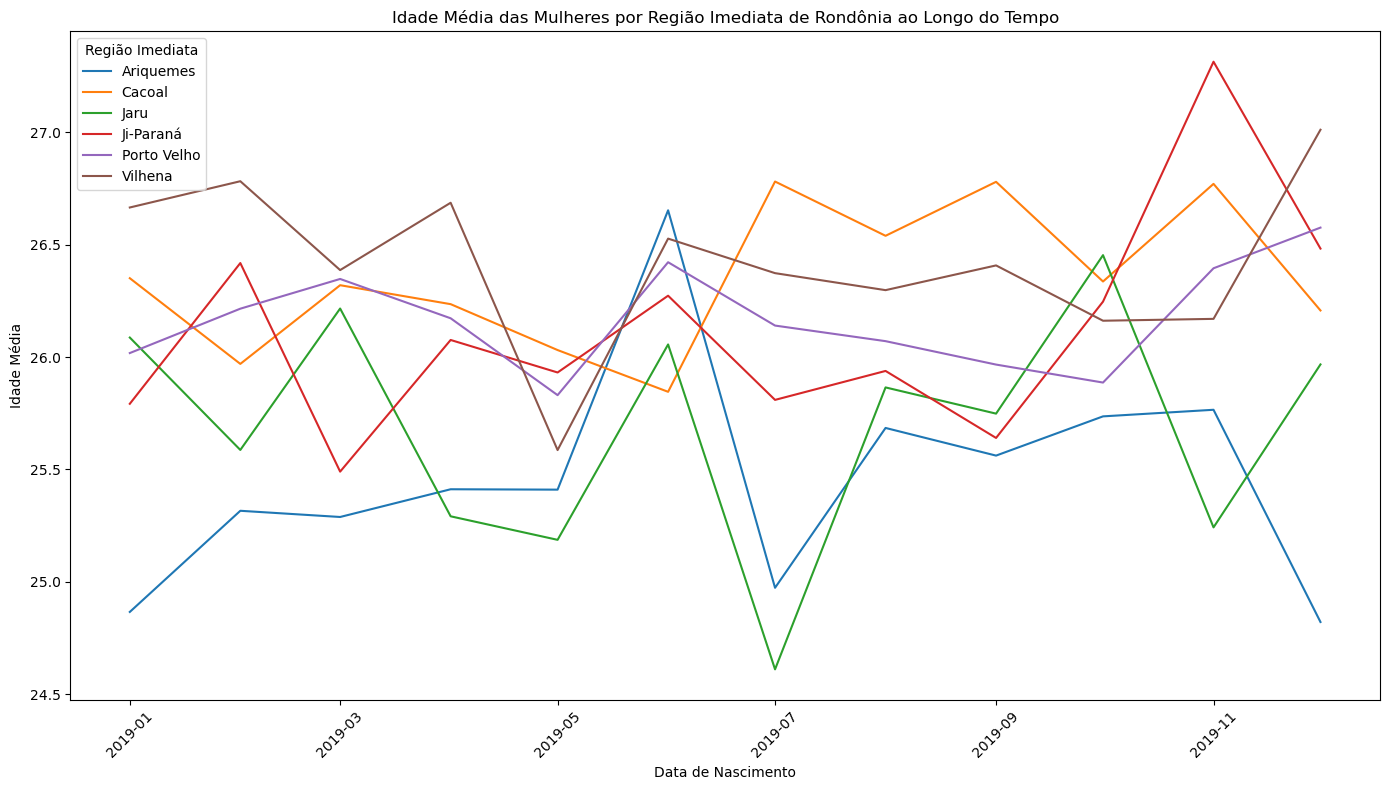

In [17]:
# Adicionar a coluna de região imediata
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Converter data de nascimento para datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Calcular a idade média das mães por data e região imediata
idade_media_regiao = sinasc_raw.groupby([sinasc_raw['DTNASC'].dt.to_period('M'), 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

# Converter DTNASC de Period para datetime para plotagem
idade_media_regiao['DTNASC'] = idade_media_regiao['DTNASC'].dt.to_timestamp()

# Plotar o gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=idade_media_regiao, x='DTNASC', y='IDADEMAE', hue='regiao_imediata')
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média')
plt.xticks(rotation=45)
plt.legend(title='Região Imediata')
plt.tight_layout()
plt.show()

In [20]:
dados_idh = {
    'Município': ['Porto Velho', 'Ji-Paraná', 'Ariquemes', 'Vilhena', 'Cacoal'],
    'IDH': [0.736, 0.714, 0.702, 0.731, 0.718]
}

df_idh = pd.DataFrame(dados_idh)

def faixa_idh(idh):
    if idh >= 0.800:
        return 'IDH muito alto'
    elif idh >= 0.700:
        return 'IDH alto'
    elif idh >= 0.600:
        return 'IDH médio'
    elif idh >= 0.500:
        return 'IDH baixo'
    else:
        return 'IDH muito baixo'

df_idh['Faixa_IDH'] = df_idh['IDH'].apply(faixa_idh)

dados_adicionais = {
    'Município': ['Porto Velho', 'Ji-Paraná', 'Ariquemes', 'Vilhena', 'Cacoal'],
    'Variavel1': [100, 150, 200, 130, 170],
    'Variavel2': [20, 30, 25, 35, 28]
}

df_dados = pd.DataFrame(dados_adicionais)

df = pd.merge(df_idh, df_dados, on='Município')

estatisticas = df.groupby('Faixa_IDH')[['Variavel1', 'Variavel2']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

print(estatisticas)

          Variavel1                                            Variavel2  \
                sum   mean  min  max median        std     var       sum   
Faixa_IDH                                                                  
IDH alto        750  150.0  100  200  150.0  38.078866  1450.0       138   

                                               
           mean min max median      std   var  
Faixa_IDH                                      
IDH alto   27.6  20  35   28.0  5.59464  31.3  


In [4]:
 def categorizar_ifdm(ifdm): 
     if ifdm >= 0.7: 
         return 'Moderado' 
     elif ifdm >= 0.5: 
         return 'Regular' 
     else: 
         return 'Baixo'
         
dados = { 
    'Porto Velho': 0.7257, 
    'Ji-Paraná': 0.7117, 
    'Ariquemes': 0.7746, 
    'Castanheiras': 0.5430, 
    'Cajubim': 0.5055 } 
# Aplicar a função de mapeamento 
agrupamentos = {} 
for municipio, ifdm in dados.items(): 
    categoria = categorizar_ifdm(ifdm) 
    if categoria not in agrupamentos: 
        agrupamentos[categoria] = [] 
    agrupamentos[categoria].append(municipio) 
        
print(agrupamentos)

{'Moderado': ['Porto Velho', 'Ji-Paraná', 'Ariquemes'], 'Regular': ['Castanheiras', 'Cajubim']}


In [12]:
def categorizar_pib(pib):
    if pib >= 10000000:
        return 'Muito Alto'
    elif pib >= 500000:
        return 'Alto'
    elif pib >= 200000:
        return 'Médio'
    else:
        return 'Baixo'

dados_pib = {
    'Porto Velho': 17912070,
    'Ji-Paraná': 3783972,
    'Vilhena': 2831175,
    'Monte Negro':219152,
    'Alta Floresta do Oeste': 496000
}

agrupamentos_pib = {}
for municipio, pib in dados_pib.items():
    categoria = categorizar_pib(pib)
    if categoria not in agrupamentos_pib:
        agrupamentos_pib[categoria] = []
    agrupamentos_pib[categoria].append(municipio)

print(agrupamentos_pib)

{'Muito Alto': ['Porto Velho'], 'Alto': ['Ji-Paraná', 'Vilhena'], 'Médio': ['Monte Negro', 'Alta Floresta do Oeste']}


Observando o IDH vimos que a cidade com maior índice de desenvolvimento humano é Porto velho em seguida Vilhena, já no PIB vimos que o maior é Porto Velho porém osegundo é Ji-Paraná. Isso sugere uma correlação entre desenvolvimento econômico e humano: municípios com maior PIB tendem a apresentar melhores indicadores sociais, como emprego, renda, educação e saúde, porém isso não é uma regra de fato.